# Random Forest Classifier


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/sample_data/full_data.csv")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Importing the Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

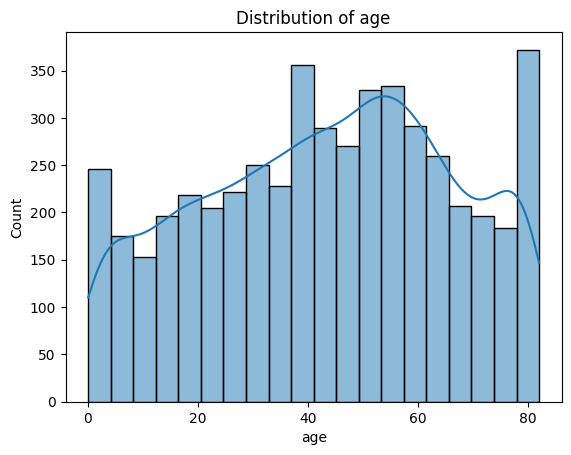

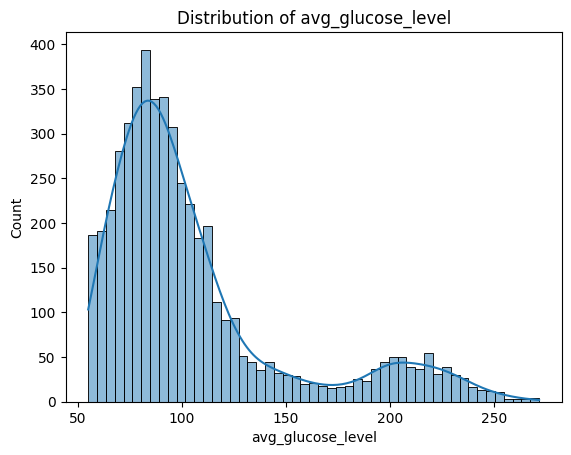

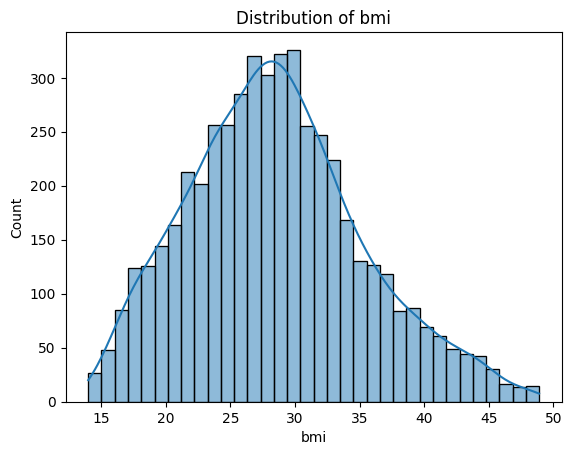

In [ ]:
# Distribution of numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

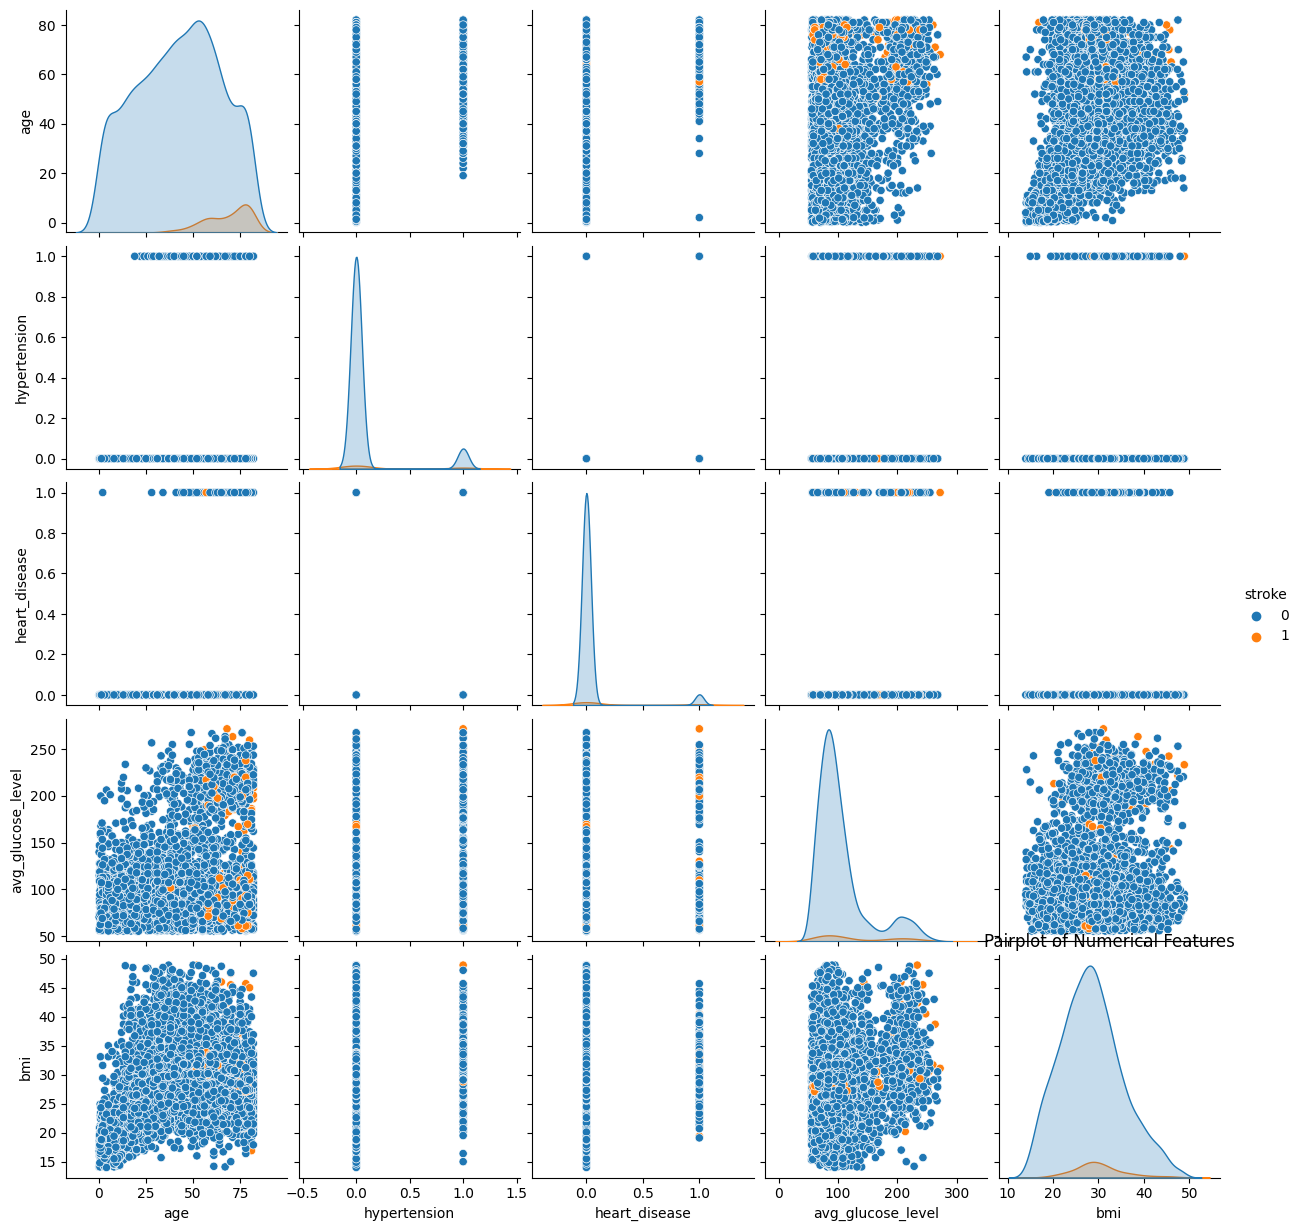

In [ ]:
# Pairplot to explore relationships between numerical features
sns.pairplot(data, hue='stroke')
plt.title('Pairplot of Numerical Features')
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# Get unique categorical values for specific features to get unique values
unique_gender = data['gender'].unique()
unique_ever_married = data['ever_married'].unique()
unique_work_type = data['work_type'].unique()
unique_residence_type = data['Residence_type'].unique()
unique_smoking_status = data['smoking_status'].unique()

print("Unique values for 'gender':", unique_gender)
print("Unique values for 'ever_married':", unique_ever_married)
print("Unique values for 'work_type':", unique_work_type)
print("Unique values for 'Residence_type':", unique_residence_type)
print("Unique values for 'smoking_status':", unique_smoking_status)

Unique values for 'gender': ['Male' 'Female']
Unique values for 'ever_married': ['Yes' 'No']
Unique values for 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children']
Unique values for 'Residence_type': ['Urban' 'Rural']
Unique values for 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})
data['work_type']= data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [ ]:
X = data.drop('stroke', axis=1)
y = data['stroke']

X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.4, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
estimators = [50, 100, 150]
jobs = [1, 2, 4]

results_60 = []

for n_estimators in estimators:
    for n_jobs in jobs:
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs)
        model.fit(X_train_60, y_train_60)
        y_pred = model.predict(X_test_60)

        accuracy = accuracy_score(y_test_60, y_pred)
        mse = mean_squared_error(y_test_60, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_60, y_pred)

        results_60.append((n_estimators, n_jobs, accuracy, mse, rmse, mae))

In [ ]:
estimators = [50, 100, 150]
jobs = [1, 2, 4]

results_70 = []

for n_estimators in estimators:
    for n_jobs in jobs:
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs)
        model.fit(X_train_70, y_train_70)
        y_pred = model.predict(X_test_70)

        accuracy = accuracy_score(y_test_70, y_pred)
        mse = mean_squared_error(y_test_70, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_70, y_pred)

        results_70.append((n_estimators, n_jobs, accuracy, mse, rmse, mae))

In [ ]:
print("Evaluation for 60-40 data split model: ")
for result in results_60:
    n_estimators, n_jobs, accuracy, mse, rmse, mae = result
    print(f"Estimators: {n_estimators}, Jobs: {n_jobs}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

Evaluation for 60-40 data split model: 
Estimators: 50, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 50, Jobs: 2
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 50, Jobs: 4
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 2
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 4
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 150, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 150, Jobs: 2
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 150, Jobs: 4
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05


In [ ]:
print("Evaluation for 70-30 data split model: ")

for result in results_70:
    n_estimators, n_jobs, accuracy, mse, rmse, mae = result
    print(f"Estimators: {n_estimators}, Jobs: {n_jobs}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

Evaluation for 70-30 data split model: 
Estimators: 50, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 50, Jobs: 2
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 50, Jobs: 4
Accuracy: 0.94
MSE: 0.06
RMSE: 0.24
MAE: 0.06
Estimators: 100, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 2
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 4
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 150, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 150, Jobs: 2
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 150, Jobs: 4
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05


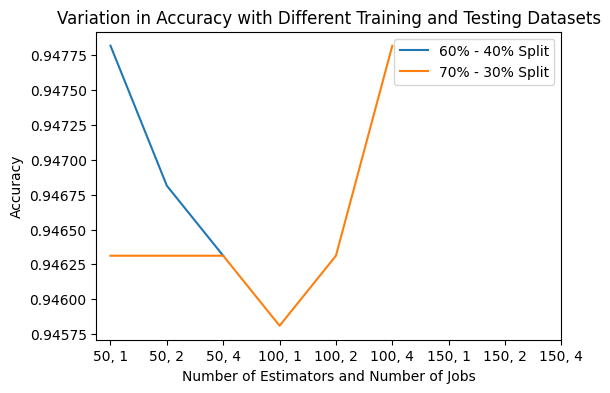

In [ ]:
# Create lists to store accuracy values for different splits
accuracies_60 = []
accuracies_70 = []

# Train the model for each split and record accuracy
for n_estimators, n_jobs, accuracy, mse, rmse, mae in results_60:
    if n_jobs == 1:
        accuracies_60.append(accuracy)
    else:
        accuracies_70.append(accuracy)

# Plot the accuracy results
plt.figure(figsize=(6, 4))
plt.plot(accuracies_60, label='60% - 40% Split')
plt.plot(accuracies_70, label='70% - 30% Split')
plt.xticks(range(9), [f"{n_estimators}, {n_jobs}" for n_estimators, n_jobs, _, _, _, _ in results_60])
plt.xlabel('Number of Estimators and Number of Jobs')
plt.ylabel('Accuracy')
plt.title('Variation in Accuracy with Different Training and Testing Datasets')
plt.legend()
plt.show()


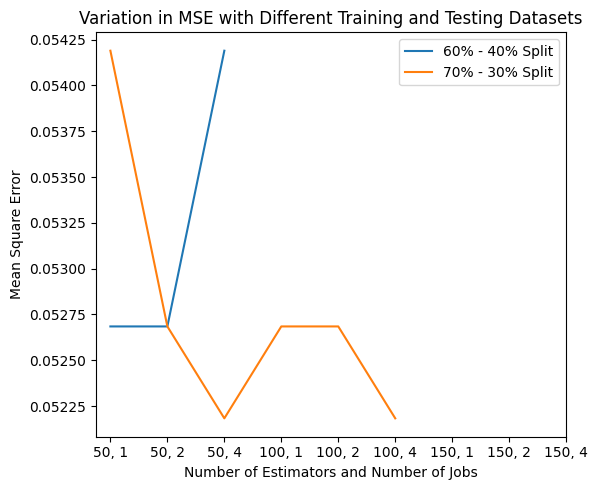

In [ ]:
# Create lists to store error values for different splits
mses_60 = []
rmses_60 = []
maes_60 = []
mses_70 = []
rmses_70 = []
maes_70 = []

# Record error values for each split
for n_estimators, n_jobs, accuracy, mse, rmse, mae in results_60:
    if n_jobs == 1:
        mses_60.append(mse)
        rmses_60.append(rmse)
        maes_60.append(mae)
    else:
        mses_70.append(mse)
        rmses_70.append(rmse)
        maes_70.append(mae)

# Plot the error results
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(mses_60, label='60% - 40% Split')
plt.plot(mses_70, label='70% - 30% Split')
plt.xticks(range(9), [f"{n_estimators}, {n_jobs}" for n_estimators, n_jobs, _, _, _, _ in results_60])
plt.xlabel('Number of Estimators and Number of Jobs')
plt.ylabel('Mean Square Error')
plt.title('Variation in MSE with Different Training and Testing Datasets')
plt.legend()

plt.tight_layout()
plt.show()


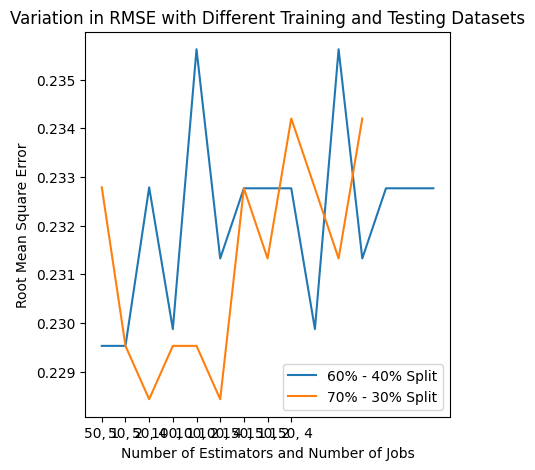

In [ ]:

# Record error values for each split
for n_estimators, n_jobs, accuracy, mse, rmse, mae in results_70:
    if n_jobs == 1:
        mses_70.append(mse)
        rmses_70.append(rmse)
        maes_70.append(mae)
    else:
        mses_60.append(mse)
        rmses_60.append(rmse)
        maes_60.append(mae)


plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 2)
plt.plot(rmses_60, label='60% - 40% Split')
plt.plot(rmses_70, label='70% - 30% Split')
plt.xticks(range(9), [f"{n_estimators}, {n_jobs}" for n_estimators, n_jobs, _, _, _, _ in results_70])
plt.xlabel('Number of Estimators and Number of Jobs')
plt.ylabel('Root Mean Square Error')
plt.title('Variation in RMSE with Different Training and Testing Datasets')
plt.legend()



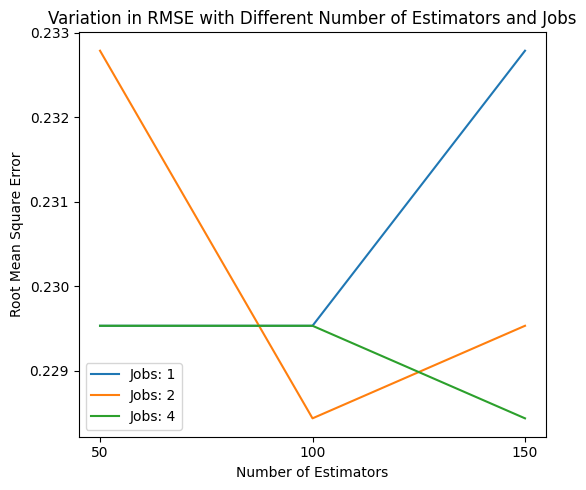

In [ ]:
# Separate results_60 by number of jobs
results_jobs_1 = [result for result in results_60 if result[1] == 1]
results_jobs_2 = [result for result in results_60 if result[1] == 2]
results_jobs_4 = [result for result in results_60 if result[1] == 4]

rmses_1 = [rmse for _, _, _, _, rmse, _ in results_jobs_1]
rmses_2 = [rmse for _, _, _, _, rmse, _ in results_jobs_2]
rmses_4 = [rmse for _, _, _, _, rmse, _ in results_jobs_4]

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 2)
plt.plot(rmses_1, label='Jobs: 1')
plt.plot(rmses_2, label='Jobs: 2')
plt.plot(rmses_4, label='Jobs: 4')
plt.xticks(range(3), [str(n_estimators) for n_estimators, _, _, _, _, _ in results_jobs_2])
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Square Error')
plt.title('Variation in RMSE with Different Number of Estimators and Jobs')
plt.legend()

plt.tight_layout()
plt.show()


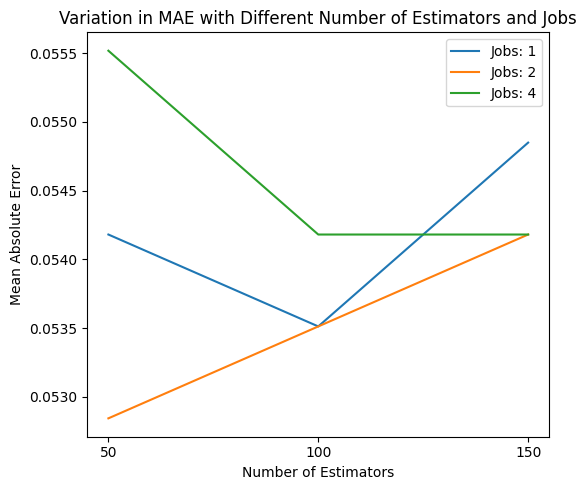

In [ ]:
# Separate results_70 by number of jobs
results_jobs_1 = [result for result in results_70 if result[1] == 1]
results_jobs_2 = [result for result in results_70 if result[1] == 2]
results_jobs_4 = [result for result in results_70 if result[1] == 4]

maes_1 = [mae for _, _, _, _, _, mae in results_jobs_1]
maes_2 = [mae for _, _, _, _, _, mae in results_jobs_2]
maes_4 = [mae for _, _, _, _, _, mae in results_jobs_4]

# Plot the error results
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 3)
plt.plot(maes_1, label='Jobs: 1')
plt.plot(maes_2, label='Jobs: 2')
plt.plot(maes_4, label='Jobs: 4')
plt.xticks(range(3), [str(n_estimators) for n_estimators, _, _, _, _, _ in results_jobs_4])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Variation in MAE with Different Number of Estimators and Jobs')
plt.legend()

plt.tight_layout()
plt.show()
